In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
theta = np.array([np.pi/15,-np.pi/9,-np.pi/20]) #angles of rotation
sigma = np.diag([3,1,0.5]) #scaling x, y, z respectively

In [3]:
#rotation about x
Rx = np.array([[1,0,0],
               [0,np.cos(theta[0]),-np.sin(theta[0])],
               [0,np.sin(theta[0]),np.cos(theta[0])]])

#rotation about y
Ry = np.array([[np.cos(theta[1]),0,-np.sin(theta[1])],
               [0,1,0],
               [np.sin(theta[1]),0,np.cos(theta[1])]])

#rotation about z
Rz = np.array([[np.cos(theta[2]),-np.sin(theta[2]),0],
               [np.sin(theta[2]),np.cos(theta[2]),0],
               [0,0,1]])

The $S$ matrix is SVD will capture the streching factors and the $U$ matrix will capture the rotation matrices 

In [4]:
#The transformation from the X and Y matrices would be same
X = Rz @ Ry @ Rx @ sigma #strech => rotate about x => rotate about y => rotate about z
U, S, VT = np.linalg.svd(X, full_matrices = False)
Y = U @ np.diag(S)

The spherical coordinates are
\begin{align*}x &= \rho \sin(\phi)\cos(\theta)\\ y &= \rho \sin(\phi)\sin(\theta)\\ z &= \rho \cos(\phi)\end{align*}
$\rho$ is the radius of the sphere. $\phi$ is the angle the vector make with $z-$axis. $\theta$ is the angle made by the projection of the vector on $x-y$ plane with $x$-axis 

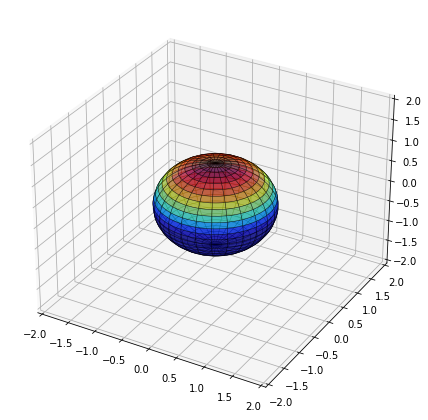

In [5]:
#plot sphere
plt.rcParams['figure.figsize'] = [16, 16]

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')

#linspace creates a equal spaced array values given range and size  
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)

#spherical coordinate representation
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

#plot surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),
                         linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')

ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

plt.show()

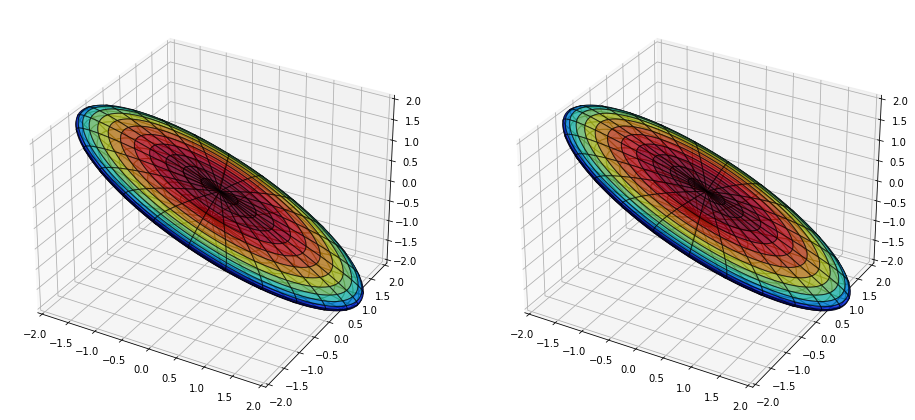

In [6]:
# zeros array with same size as k where k is like("k")
xR1 = np.zeros_like(x)
yR1 = np.zeros_like(y)
zR1 = np.zeros_like(z)

xR2 = np.zeros_like(x)
yR2 = np.zeros_like(y)
zR2 = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[0]):
        vec = [x[i,j],y[i,j],z[i,j]] #represents point in the circle
        vecR1 = X @ vec #Trasnformed vector
        vecR2 = Y @ vec #Trasnformed vector
        
        xR1[i,j] = vecR1[0]
        yR1[i,j] = vecR1[1]
        zR1[i,j] = vecR1[2]
        
        xR2[i,j] = vecR2[0]
        yR2[i,j] = vecR2[1]
        zR2[i,j] = vecR2[2]

fig = plt.figure()

ax2 = fig.add_subplot(122, projection='3d')

surf2 = ax2.plot_surface(xR1, yR1, zR1, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),
                         rcount=30,ccount=30)
surf2.set_edgecolor('k')

ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)

ax3 = fig.add_subplot(121, projection='3d')

surf3 = ax3.plot_surface(xR2, yR2, zR2, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),
                         rcount=30,ccount=30)
surf3.set_edgecolor('k')

ax3.set_xlim3d(-2, 2)
ax3.set_ylim3d(-2, 2)
ax3.set_zlim3d(-2, 2)

plt.show()